In [238]:
# Edit this cell to print out your name.
print "My name is %s" % ("Brian Valtin")

My name is Brian Valtin


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [239]:
import numpy as np
months = 100000
days = 30
rained_once = 0
for i in range (0,months):
    weather = np.random.randint(1,6,days)
    raintracker = 0
    for i in range (0,days):
        if weather[i] == 3:
            raintracker += 1
    if raintracker == 1:
        rained_once += 1
rained_once = rained_once * 1.0
x = (rained_once/months)*100
print "There is a %.10f percent chance that it rains once in a month" % (x)

There is a 0.8990000000 percent chance that it rains once in a month


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [240]:
months = 100000
rained_8_or_more = 0
for i in range (0,months):
    weather = np.random.randint(1,11,days)
    raintracker = 0
    for i in range (0,days):
        if weather[i] == 3:
            raintracker += 1
    if raintracker >= 8:
        rained_8_or_more += 1
rained_8_or_more = rained_8_or_more * 1.0
x = (rained_8_or_more/months)*100
print "There is a %.10f percent chance that it rains at least 8 days in a month" % (x)


There is a 0.7910000000 percent chance that it rains at least 8 days in a month


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [241]:
def amount_of_rain():
    amount_of_rain = 0
    numbers = np.random.randint(1,11,1)
    for i in range (0,1):
        if numbers[i] == 1 or numbers[i] == 2:
            amount_of_rain = 1
        elif numbers[i] == 3 or numbers[i] == 4 or numbers[i] == 5:
            amount_of_rain = 2
        elif numbers[i] == 6 or numbers[i] == 7 or numbers[i] == 8:
            amount_of_rain = 3
        elif numbers[i] == 9:
            amount_of_rain = 4
        elif numbers[i] == 10:
            amount_of_rain = 5
    return amount_of_rain

def rain():
    months = 10000
    days = 30
    rains_10cm_or_more = 0
    for i in range (0,months):
        total_rainfall = 0
        for i in range (0,days):
            numbers = np.random.randint(1,11,1)
            for i in range (0,1):
                if numbers[i] == 3:
                    total_rainfall = total_rainfall + amount_of_rain()
                    numbers = np.random.randint(1,6,1)
                    for i in range (0,1):
                        if numbers[i] == 3:
                            total_rainfall = total_rainfall + amount_of_rain()
                            numbers = np.random.randint(1,5,1)
                            for i in range (0,1):
                                if numbers[i] == 3:
                                    total_rainfall = total_rainfall + amount_of_rain()
                                    numbers = np.random.randint(1,21,1)
                                    for i in range (0,1):
                                        if numbers == 3:
                                            total_rainfall = total_rainfall + amount_of_rain()
        if total_rainfall >= 10:
            rains_10cm_or_more += 1
        
    rains_10cm_or_more = rains_10cm_or_more * 1.0
    x = (rains_10cm_or_more/months)*100
    return x

y = rain()
print "There is a %.10f percent chance that it rains at least 10 cm in a month" % (y)           
    
            
    

There is a 45.4600000000 percent chance that it rains at least 10 cm in a month


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


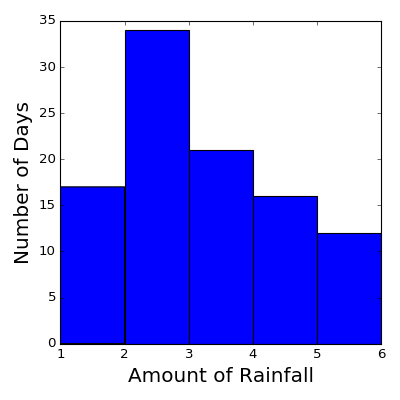

In [242]:
import matplotlib.pylab as plt
%matplotlib notebook

ndays = 100 

values = []
for i in range(0,ndays):
    
    value = amount_of_rain()
    values.append(value)
    
plt.figure(figsize=(5,5))

plt.hist(values,bins=5,range=(1,6)) 

plt.xlabel("Amount of Rainfall",fontsize=18)
plt.ylabel("Number of Days",fontsize=18)

plt.tight_layout()


In [5]:
# Your code here?

### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [6]:
# Your code here